In [157]:
import os
import glob
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

import fnmatch
import collections
import keras
import librosa
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot, cm
from tqdm import tqdm
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/1")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
user = pd.concat([pd.read_csv(f) for f in files])
user=user.sample(frac=1).reset_index(drop=True)
user=user.assign(user=1)
user.to_csv("../user.csv", index=False, encoding='utf-8-sig')


['1.csv', '3.csv', '4.csv', '10.csv', '2.csv', '7.csv', '6.csv', '8.csv', '9.csv', '0.csv', '5.csv']


In [158]:
user

,time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user
0,15,0.000000,0.200000,0,0.666667,0,0,0,0.333333,0.000000,0,30.733333,0,1,1,1
1,40,1.575000,0.175000,0,0.571429,0,0,0,0.428571,0.000000,0,21.000000,0,1,1,1
2,70,2.585714,0.157143,0,0.545455,0,0,0,0.454545,0.000000,0,20.085714,0,1,1,1
3,75,2.413333,0.160000,0,0.500000,0,0,0,0.416667,0.083333,0,19.213333,0,1,1,1
4,10,0.000000,0.100000,0,1.000000,0,0,0,0.000000,0.000000,0,25.900000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,10,0.000000,0.200000,0,0.500000,0,0,0,0.500000,0.000000,0,31.100000,0,1,1,1
122,45,0.000000,0.200000,0,0.555556,0,0,0,0.444444,0.000000,0,25.933333,0,1,1,1
123,30,1.100000,0.300000,0,0.555556,0,0,0,0.333333,0.111111,0,32.933333,0,1,1,1
124,30,0.000000,0.266667,0,0.500000,0,0,0,0.500000,0.000000,0,28.133333,0,1,1,1


In [159]:
size= int(len(user.index)*0.8)
print(size)
user_train=user.iloc[:size, :]
user_test=user.iloc[size:, :]

100


In [160]:
os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/0")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
nouser = pd.concat([pd.read_csv(f) for f in files])
nouser=nouser.sample(frac=1).reset_index(drop=True)
nouser=nouser.assign(user=0)
nouser.to_csv("../nouser.csv", index=False, encoding='utf-8-sig')

['15.csv', '20.csv', '17.csv', '21.csv', '18.csv', '10.csv', '13.csv', '14.csv', '16.csv', '22.csv', '11.csv', '8.csv', '19.csv', '9.csv', '12.csv']


In [161]:
nouser

,time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user
0,15,0.00,0.266667,0.000000,0.500000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,36.600000,0.000000,1,1,0
1,25,0.00,0.760000,0.157895,0.263158,0.210526,0.000000,0.157895,0.210526,0.0,0.0,56.040000,0.000000,0,0,0
2,20,2.15,0.850000,0.176471,0.176471,0.117647,0.058824,0.000000,0.470588,0.0,2.6,52.250000,0.000000,1,1,0
3,40,0.00,0.500000,0.250000,0.250000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,31.425000,0.050000,0,0,0
4,35,0.00,0.571429,0.250000,0.250000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,33.714286,0.057143,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,10,4.40,0.500000,0.000000,0.400000,0.200000,0.000000,0.200000,0.200000,0.0,0.0,57.200000,0.000000,1,0,0
126,20,0.00,0.400000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,18.550000,0.100000,0,0,0
127,15,0.00,0.533333,0.375000,0.125000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,45.066667,0.000000,0,0,0
128,5,0.00,0.400000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.0,34.400000,0.000000,1,1,0


In [162]:
size= int(len(nouser.index)*0.8)

print(size)
nouser_train=nouser.iloc[:size, :]
nouser_test=nouser.iloc[size:, :]

104


In [163]:
frames=[nouser_train, user_train]
train=pd.concat(frames)
frames=[nouser_test, user_test]
test=pd.concat(frames)

In [164]:
testData=test.drop(columns='time_secs')
trainData=train.drop(columns='time_secs')


In [165]:
# Splitting the dataset into training, validation and testing dataset
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=50)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]
print(set(y_train))

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

{0, 1}
Y from training data: (142,)
Y from validation data: (62,)
Y from test data: (52,)


In [166]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

print(set(y_train))


X from training data (142, 14)
X from validation data (62, 14)
X from test data (52, 14)
{0, 1}


In [167]:
import os
import fnmatch
import collections
weight={}
path='audios/audios/56_speakers_audio_data'
weight.update({0: len(nouser.index), 1: len(user.index)})
max_value=sum(weight.values())
print("Sum of values: "+str(max_value))
weight = {key: value for key, value in sorted(weight.items())}
print(weight)
class_weight = {k: 1-(v/max_value) for k, v in weight.items()}
print(class_weight)

Sum of values: 256
{0: 130, 1: 126}
{0: 0.4921875, 1: 0.5078125}


In [168]:
from keras import models
from keras import layers
import keras

model = models.Sequential()
model.add(layers.Dense(150, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(y_train), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
print(X_train.shape)
#Train with early stopping to avoid overfitting
y_train=np.array(y_train, dtype=int)
y_val=np.array(y_val, dtype=int)
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),
                    epochs=200,batch_size=5, callbacks=[es])

(142, 14)
Epoch 1/200
29/29 [==============================] - 0s 5ms/step - loss: 4.5184 - accuracy: 0.1831 - val_loss: 4.1106 - val_accuracy: 0.5645
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 3.0024 - accuracy: 0.6620 - val_loss: 1.5465 - val_accuracy: 0.6613
Epoch 3/200
29/29 [==============================] - 0s 2ms/step - loss: 0.8740 - accuracy: 0.7535 - val_loss: 0.2919 - val_accuracy: 0.9516
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3855 - accuracy: 0.8592 - val_loss: 0.2023 - val_accuracy: 0.9516
Epoch 5/200
29/29 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8662 - val_loss: 0.1810 - val_accuracy: 0.9516
Epoch 6/200
29/29 [==============================] - 0s 2ms/step - loss: 0.2151 - accuracy: 0.9366 - val_loss: 0.1764 - val_accuracy: 0.9355
Epoch 7/200
29/29 [==============================] - 0s 2ms/step - loss: 0.2208 - accuracy: 0.9155 - val_loss: 0.1796 - val_accuracy: 0.9355
Epo

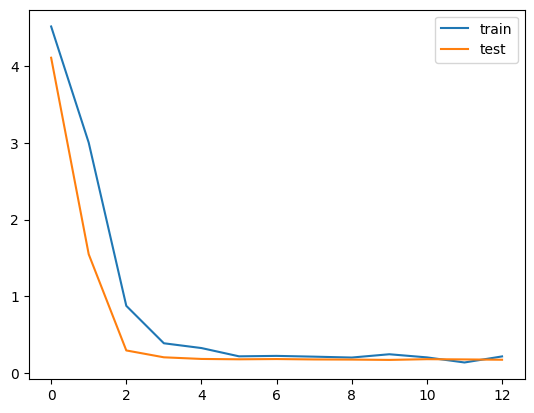

In [169]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [170]:
        
def printPrediction(X_data, y_data, printDigit, model):
    print('\n# Generate predictions')
    for i in range(len(y_data)):
        predict_x=model.predict(X_data[i:i+1])[0]
        predict_classes = np.argmax(predict_x)
        print(predict_classes)
        print(max(predict_x))
        prediction = predict_classes
    
        user = y_data[i]
        if printDigit == True:
           print("Number={0:d}, y={1:10d}- prediction={2:10d}- match={3}".format(i, user, prediction, user==prediction))
        else:
           print("y={0:10d}- prediction={1:10d}- match={2}".format(user, prediction, user==prediction))

In [171]:
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

def report(X_data, y_data):
    #Confution Matrix and Classification Report
    #predict_y = model.predict_prob(X_data)
    predict_y=model.predict(X_data)
    Y_pred = np.argmax(predict_y, axis=1)
    y_test_num = y_data.astype(np.int64)
    conf_mt = confusion_matrix(y_test_num, Y_pred)
    print(conf_mt[len(set(y_test_num))-1])
    key=0
    for val in conf_mt[len(set(y_test_num))-1]:
        if val!=0:
            print(key)
        key=key+1
    conf_mt=conf_mt / conf_mt.astype(np.float).sum(axis=1)
    #print(conf_mt)
    plt.matshow(conf_mt)
    plt.show()
    print('\nClassification Report')
    print(classification_report(y_test_num, Y_pred))


In [172]:
print('\n# TEST DATA #\n')
y_test=np.array(y_test, dtype=int)
score = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
# Prediction
printPrediction(X_test, y_test, False, model)


# TEST DATA #

2/2 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9038
accuracy: 90.38%

# Generate predictions
1/1 [==============================] - 0s 44ms/step
0
0.99999446
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 14ms/step
0
0.998425
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.99999994
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.9999555
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.9999971
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
1
0.99977434
y=         0- prediction=         1- match=False
1/1 [==============================] - 0s 15ms/step
0
0.99999964
y=         0- prediction=         0- match=True
1/1 [==============================] - 0s 15ms/step
0
0.99999917
y=   

In [173]:
score

[0.2611992657184601, 0.9038461446762085]

Classification Report for Test Data

(52,)
(52, 14)
2/2 [==============================] - 0s 2ms/step
[ 3 23]
0
1


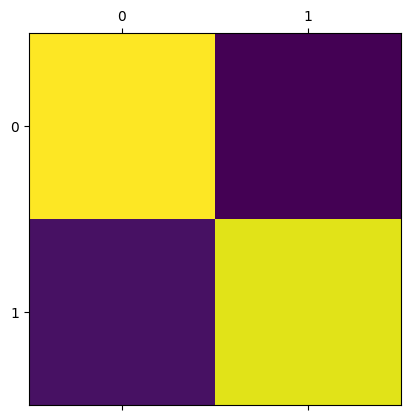


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.92      0.91        26
           1       0.92      0.88      0.90        26

    accuracy                           0.90        52
   macro avg       0.90      0.90      0.90        52
weighted avg       0.90      0.90      0.90        52



In [174]:
print("Classification Report for Test Data\n")
print(y_test.shape)
print(X_test.shape)
report(X_test, y_test)

In [175]:
import joblib
model.save('../behavior-recognition.h5')
joblib.dump(scaler, '../behavior_scaler.save') 

['../behavior_scaler.save']

### Testing

os.chdir ("/home/silvia/Escritorio/tfm/Server_auth/behavior/test")
extension = 'csv'
files=[i for i in glob.glob('*.{}'.format(extension))]
print(files)
test = pd.concat([pd.read_csv(f) for f in files])
test=test.sample(frac=1).reset_index(drop=True)
test=test.drop(columns='time_secs')

In [85]:
obj=[
    "time_secs,scrolling,mouse_clicks,e_legend_clicks,e_map_clicks,map_clicks,general_clicks,close_top_clicks,close_bottom_clicks,go_clicks,map_zoom,mouse_mov,key_presses,priority,order,user",
    [
        5,
        23.2,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        1
    ],
    [
        10,
        13.8,
        0.1,
        0,
        1,
        0,
        0,
        0,
        0,
        0,
        0,
        23.1,
        0,
        1,
        1,
        1
    ],
    [
        15,
        9.2,
        0.2,
        0,
        0.6666666666666666,
        0,
        0,
        0,
        0.3333333333333333,
        0,
        0,
        29,
        0,
        1,
        1,
        1
    ],
    [
        20,
        6.9,
        0.25,
        0,
        0.6,
        0,
        0,
        0,
        0.4,
        0,
        0,
        29.85,
        0,
        1,
        1,
        1
    ],
    [
        25,
        5.52,
        0.24,
        0,
        0.5,
        0,
        0,
        0,
        0.5,
        0,
        0,
        28.8,
        0,
        1,
        1,
        1
    ],
    [
        30,
        4.6,
        0.23333333333333334,
        0,
        0.5714285714285714,
        0,
        0,
        0,
        0.42857142857142855,
        0,
        0,
        31,
        0,
        1,
        1,
        1
    ],
    [
        35,
        3.942857142857143,
        0.2571428571428571,
        0,
        0.5555555555555556,
        0,
        0,
        0,
        0.4444444444444444,
        0,
        0,
        31.942857142857143,
        0,
        1,
        1,
        1
    ],
    [
        40,
        3.45,
        0.275,
        0,
        0.5454545454545454,
        0,
        0,
        0,
        0.45454545454545453,
        0,
        0,
        34.875,
        0,
        1,
        1,
        1
    ],
    [
        45,
        3.066666666666667,
        0.26666666666666666,
        0,
        0.5,
        0,
        0,
        0,
        0.4166666666666667,
        0.08333333333333333,
        0,
        33.644444444444446,
        0,
        1,
        1,
        1
    ],
    [
        50,
        2.76,
        0.24,
        0,
        0.5,
        0,
        0,
        0,
        0.4166666666666667,
        0.08333333333333333,
        0,
        30.28,
        0,
        1,
        1,
        1
    ]
]

In [86]:
array=np.array(obj)
test=pd.DataFrame([x for i, x in enumerate(array) if i!=0], columns=array[0].split(','))
test=test.drop(columns='time_secs')

In [87]:
def predict():
    
    X_test = np.array(test.iloc[:, :-1], dtype = float)
    y_test = test.iloc[:, -1]
    
    X_test = scaler.transform( X_test )
    #y_test=np.array(y_test, dtype=int)
    
    score = new_model.evaluate(X_test, y_test)
    print(score)


In [88]:
print(score[1])

0.9803921580314636


In [89]:
new_model = keras.models.load_model('../behavior-recognition.h5')
scaler = joblib.load('../behavior_scaler.save') 


In [90]:
predict()

1/1 [==============================] - 0s 99ms/step - loss: 0.0039 - accuracy: 1.0000
[0.0038828395772725344, 1.0]


In [91]:
print(score[1])

0.9803921580314636
